<a href="https://colab.research.google.com/github/gustavo-ifusp/edisc-analytics/blob/main/g5-Analise_de_Dados_Indicadores_bolsa_PUB_junho_2021_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analises de Dados (Junho/2021) - parte 2 - E-Disciplinas USP - Bolsa PUB 2020/2021**
Professor Orientador Dr. Ewout Ter Haar

Aluno Gustavo de Andrade

Este estudo é uma continuação ao projeto do Programa Unificado de Bolsa da Universidade de São Paulo de apoio pedagógico na plataforma moodle E-Disciplinas USP. 

Buscarei indicadores em que possamos comparar institutos chaves de analise da USP, desenvolvendo uma lógica para medir a intensidade de uso do E-Disciplina pelos clicks totais dos ambientes em todos recursos disponiveis para cada instituto.<br> <br> Na [parte um](https://colab.research.google.com/drive/1SsGKdqKwfN5brgigyqJK8uv-8BThSfOc?usp=sharing) deste estudo, fiz uma média em relação ao número de matrículado de cada instituto, o que foi impreciso pelo fato de que muitos ambientes de um instituto é oferecimento para outro instituto, logo, falha ao medir a intensidade de uso. <br> <br>
A solução proposta foi analisar em relação ao número de doscentes de cada instituto para conseguir medir essa intensidade de uso dos ambientes para cada professor daquele instituto.

Este estudo, assim como os dados apresentados, são te interesse particular, com fim educacional, sendo proíbido sua reprodução em todas hipóteses, permitido apenas a visualização no próprio canal disponivel.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Aqui efetuarei a leitura dos dataframes para comparação:**<br>
São arquivos com 1 linha por "módulo" (= recurso ou atividade no Moodle) e a informação mais importante nas colunas é o número de "views" (cliques), quantos alunos eram inscritos neste ambiente e "usuários únicos" que clicaram neste módulo. Tem também uma coluna derivada fracstudents que é a fração dos alunos que clicaram pelo menos uma vez no módulo.

  * quantos cliques (por aluno) fizeram (agregando tudo)
  * quantos cliques por módulo
  * quantos cliques em por exemplo "fórum" ou "tarefa" (=assign)

In [2]:
url1 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FD.csv"
base_FD = pd.read_csv(url1)
base_FD.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
10808,314,resource,2811134,14.0,10.0,1.400000,9,1,1.555556,1.111111
1890,59,forum,2753817,67.0,34.0,1.970588,89,4,0.752809,0.382022
112,3,resource,2879277,37.0,29.0,1.275862,170,14,0.217647,0.170588


In [3]:
url2 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FE.csv"
base_FE = pd.read_csv(url2)
base_FE.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
2168,65,assign,3149869,20.0,5.0,4.000000,16,4,1.250000,0.312500
1116,29,assign,2826136,1038.0,44.0,23.590909,49,2,21.183673,0.897959
2675,76,resource,3253128,3.0,2.0,1.500000,54,1,0.055556,0.037037


In [4]:
url3 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FEA.csv"
base_FEA = pd.read_csv(url3)
base_FEA.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
13895,275,resource,3126812,75.0,41.0,1.829268,75,1,1.000000,0.546667
23834,451,resource,3270470,46.0,32.0,1.437500,142,3,0.323944,0.225352
10179,188,assign,2865589,1174.0,63.0,18.634921,63,1,18.634921,1.000000


In [5]:
url4 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FFLCH.csv"
base_FFLCH = pd.read_csv(url4)
base_FFLCH.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
27849,696,resource,2944899,132.0,64.0,2.062500,127,5,1.039370,0.503937
2824,58,forum,2818205,58.0,14.0,4.142857,38,3,1.526316,0.368421
26834,678,resource,3044613,248.0,90.0,2.755556,103,2,2.407767,0.873786


In [6]:
url5 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-FMRP.csv"
base_FMRP = pd.read_csv(url5)
base_FMRP.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
11233,214,resource,3014094,96.0,48.0,2.000000,53,2,1.811321,0.905660
3273,81,resource,2737717,34.0,28.0,1.214286,93,10,0.365591,0.301075
19005,337,resource,3278593,3.0,2.0,1.500000,21,10,0.142857,0.095238


In [7]:
url6 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/mv-2020-IF.csv"
base_IF = pd.read_csv(url6)
base_IF.sample(3)

,course,name,cmid,views,uniqusers,vpu,students,teachers,vps,fracstudents
573,12,label,2868134,0.0,0.0,0.00000,15,1,0.000000,0.000000
6810,116,resource,3134558,418.0,122.0,3.42623,178,4,2.348315,0.685393
5765,98,resource,3266608,19.0,10.0,1.90000,44,2,0.431818,0.227273


In [8]:
url7 = "https://raw.githubusercontent.com/atp/edisc-analytics/main/data/processed/docdistur.csv"
base_doc = pd.read_csv(url7)
base_doc['sglund'] = base_doc['sglund'].astype('object')
base_doc['ano'] = base_doc['ano'].astype('int64')
base_doc.rename(columns={'sglund':'unidade'}, inplace = True)
base_doc = base_doc[base_doc["ano"] == 2020]
base_doc.sample(2)

,unidade,ano,docentes,disciplinas,turmas
368,FD,2020,147,254,952
1137,MAE,2020,9,9,14


In [9]:
url8 = "https://raw.githubusercontent.com/gustavo-ifusp/edisc-analytics/main/data/raw/mc-24-11-2020.csv"
dados = pd.read_csv(url8)
dados.iloc[-4:]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,link,assign,attendance,bigbluebuttonbn,book,chat,choice,data,dialogue,folder,forum,glossary,imscp,label,lesson,lti,oublog,ouwiki,page,questionnaire,quiz,recordingsbn,resource,scorm,survey,url,wiki,workshop,sdi,Nunique,N,Nresource1,Nresource2,Ncommunication,Nfeedback,Nassess,Nadmin,fullname,shortname,idnumber,catname,unidade,ano,sem,advancedteacher,editingteacher,manager,monitor,student,studentcopy,teacher,nturmas,area,posgrad,coddis,semestre,activequiz,assignment,hvp,simplecertificate,videogallery,choicegroup,scheduler,vpl,offlinequiz,obs,journal,poster,feedback,checklist,pdfannotator,publication,studentquiz,game,quizgame,subcourse
38290,83726,https://edisciplinas.usp.br/course/view.php?id...,2,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,101,0.0,0,0,0,0,0.149069,3,104,101,0,1,0,2,0,NCC5701 - Metodologia Científica e Estudos Clí...,NCC5701--2020,NCC5701.2.2,NCC,FMRP,2020,2,0,1,0,0,4,0,0,1,biologicas,POS,NCC5701,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38291,83948,https://edisciplinas.usp.br/course/view.php?id...,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,1,0,0,0.693147,2,2,1,0,1,0,0,0,LES5780 - Desenvolvimento Econômico (2020),LES5780--2020,LES5780.11.2,ESALQ,ESALQ,2020,2,0,1,0,0,2,0,0,1,humanas,POS,LES5780,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38292,83959,https://edisciplinas.usp.br/course/view.php?id...,1,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.693147,2,2,0,0,1,0,1,0,teste_marcos,teste_marcos,NaN,FFLCH,FFLCH,2020,2,0,0,0,0,1,0,0,0,humanas,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38293,83965,https://edisciplinas.usp.br/course/view.php?id...,3,1,1,1,1,1,0,1,1,4,1,0.0,7,1,0.0,0,0,2,0,8,0.0,1,0.0,0,6,0,0,2.517794,18,42,15,4,7,1,12,2,STI FMRP 2020,STI FMRP 2020,NaN,STI,FMRP,2020,2,0,1,0,0,0,0,0,0,biologicas,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
soma_views_FD = base_FD['views'].sum()
soma_views_FE = base_FE['views'].sum()
soma_views_FEA = base_FEA['views'].sum()
soma_views_FFLCH = base_FFLCH['views'].sum()
soma_views_FMRP = base_FMRP['views'].sum()
soma_views_IF = base_IF['views'].sum()
print("A soma do views do IF: ",soma_views_IF)

A soma do views do IF:  2822222.0


In [11]:
soma_views = pd.DataFrame()
soma_views['unidade'] = ["FD", "FE", "FEA", "FFLCH", "FMRP", "IF"]
soma_views['ano'] = ["2020", "2020", "2020", "2020", "2020", "2020"]
soma_views['soma_views'] = [soma_views_FD, soma_views_FE, soma_views_FEA, soma_views_FFLCH, soma_views_FMRP, soma_views_IF]
soma_views

,unidade,ano,soma_views
0,FD,2020,2880586.0
1,FE,2020,459504.0
2,FEA,2020,5087763.0
3,FFLCH,2020,3765446.0
4,FMRP,2020,4117761.0
5,IF,2020,2822222.0


In [12]:
NP = base_doc.groupby(['unidade', 'ano'])['docentes'].sum()
print("Tabela coma soma de docentes por unidades em 2020:")
Soma_docentes = pd.DataFrame(NP)
Soma_docentes

Tabela coma soma de docentes por unidades em 2020:


,,docentes
unidade,ano,
CEBIMar,2020,5
CENA,2020,31
EACH,2020,267
ECA,2020,184
EE,2020,1
EEFE,2020,39
EEFERP,2020,19
EEL,2020,141
EERP,2020,1


In [13]:
total_docentes = Soma_docentes.loc[['FD', 'FE', 'FEA', 'FFLCH', 'FMRP', 'IF']]
total_docentes.reset_index()
total_docentes.reset_index(level=1, inplace=True)
total_docentes.reset_index(level=0, inplace=True)

In [14]:
total_docentes

,unidade,ano,docentes
0,FD,2020,147
1,FE,2020,110
2,FEA,2020,167
3,FFLCH,2020,417
4,FMRP,2020,238
5,IF,2020,114


In [15]:
soma_views = pd.DataFrame()
soma_views['unidade'] = ["FD", "FE", "FEA", "FFLCH", "FMRP", "IF"]
soma_views['ano'] = ["2020", "2020", "2020", "2020", "2020", "2020"]
soma_views['soma_views'] = [soma_views_FD, soma_views_FE, soma_views_FEA, soma_views_FFLCH, soma_views_FMRP, soma_views_IF]
soma_views

,unidade,ano,soma_views
0,FD,2020,2880586.0
1,FE,2020,459504.0
2,FEA,2020,5087763.0
3,FFLCH,2020,3765446.0
4,FMRP,2020,4117761.0
5,IF,2020,2822222.0


#**Cliques por docentes**

Um estudo da intensidade de uso da ferramenta E-Disciplina USP para cada instituto de estudo.

In [16]:
clicks_por_docentes = pd.DataFrame()
clicks_por_docentes['unidade'] = soma_views['unidade']
clicks_por_docentes['Cliques/Total_docentes'] = soma_views['soma_views'] / total_docentes['docentes']
clicks_por_docentes

,unidade,Cliques/Total_docentes
0,FD,19595.823129
1,FE,4177.309091
2,FEA,30465.646707
3,FFLCH,9029.846523
4,FMRP,17301.516807
5,IF,24756.333333


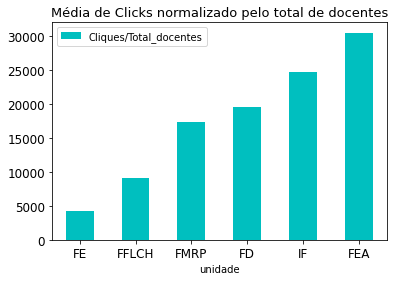

In [21]:
clicks_por_docentes.sort_values("Cliques/Total_docentes").plot(kind='bar', color="c", 
x = 'unidade', y = 'Cliques/Total_docentes')
plt.title('Média de Clicks normalizado pelo total de docentes', fontsize=13)
plt.tick_params(labelsize=12)
plt.xticks(rotation=0)
plt.show()

Uma ideia após observar esse resultado foi analisar esse mesmo modelo de média, mas em relação ao número de ambientes criados por unidades e por ano. 